In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 38.9MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [11]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [14]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [16]:
data_f = data2.loc[data2.team1.isin(['Sunrisers Hyderabad','Delhi Capitals'])] 
data_f = data_f.loc[data_f.team2.isin(['Sunrisers Hyderabad','Delhi Capitals'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
393,394,2013,Delhi,2013-04-12,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,2013-05-04,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
488,489,2014,Delhi,2014-05-10,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,NaN
530,531,2015,Visakhapatnam,2015-04-18,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Delhi Capitals,4,0,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
560,561,2015,Raipur,2015-05-09,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,6,0,MC Henriques,Shaheed Veer Narayan Singh International Stadium,VA Kulkarni,S Ravi,NaN
617,618,2016,Hyderabad,2016-05-12,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,7,CH Morris,"Rajiv Gandhi International Stadium, Uppal",K Bharatan,M Erasmus,NaN
627,628,2016,Raipur,2016-05-20,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN


Finally , We have got a complete dataset for all the matches of SRH VS DC

**Let's do Q1 now**

SRH Wins - 9
DC Wins - 6


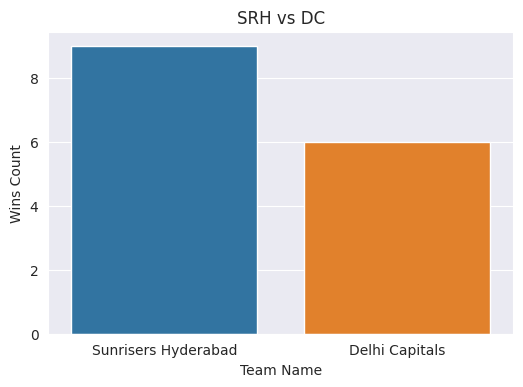

In [17]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('SRH vs DC')
A,B =data_f.winner.value_counts()

print('SRH Wins -',A)
print('DC Wins -',B)

plt.show()


SRH has a better record v DC. 

Therefore , marked SRH

**Let's do Q2 now**

**Let's find average runs in the contest of SRH v DC**

In [18]:
data_n = data.loc[data.bowling_team.isin(['Sunrisers Hyderabad','Delhi Capitals'])]
data_n = data_n.loc[data.batting_team.isin(['Sunrisers Hyderabad','Delhi Capitals'])]

In [19]:
data_n.total_runs.sum()

4568

In [20]:
data_n.match_id.nunique()

15

In [21]:
np.round(4568/15,2) # Average Runs in SRH v DC Contest

304.53

Let's mark less than 320 considering our analysis.

**For Q3, Let's find caught dismissals**



In [22]:
data_n.dismissal_kind.value_counts()

caught                   100
bowled                    28
run out                   13
lbw                        8
stumped                    4
caught and bowled          4
obstructing the field      1
hit wicket                 1
Name: dismissal_kind, dtype: int64

Taking both caught and caught and bowled

In [23]:
np.round(104/15,2) # Average caught wickets in SRH v DC

6.93

Let's mark 4-7 considering our analysis

**Let's do Q4**

**Let's find SRH v DC in first 6 overs**

In [27]:
data_c = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_c = data_c.loc[data.batting_team.isin(['Sunrisers Hyderabad'])]
data_c = data_c.loc[data_c.over<=6]

In [28]:
data_c.total_runs.sum()

753

In [29]:
data_c.match_id.nunique()

15

In [30]:
np.round(753/15,2) # Average run by SRH v DC in powerplay

50.2

In [32]:
data_c2 = data.loc[data.batting_team.isin(['Delhi Capitals'])]
data_c2 = data_c2.loc[data.bowling_team.isin(['Sunrisers Hyderabad'])]
data_c2 = data_c2.loc[data_c2.over<=6]

In [33]:
data_c2.total_runs.sum()

691

In [35]:
np.round(691/15,2) # Average runs by DC in powerplay v SRH

46.07

Let's mark 0-5 considering our analysis

**Let's do Q5 now**

**Let's find extras**

In [36]:
data_n.noball_runs.sum()

14

In [72]:
cols_to_sum = ['wide_runs','bye_runs','legbye_runs' ,'noball_runs','penalty_runs','extra_runs']

In [73]:
 data_n['Extras_Total']=data_n[cols_to_sum].sum(axis=1)
 data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,ExtrasTotal,Extras_Total
4810,21,1,Sunrisers Hyderabad,Delhi Capitals,1,1,DA Warner,S Dhawan,J Yadav,0,0,0,0,1,0,1,1,2,NaN,NaN,NaN,2,2
4811,21,1,Sunrisers Hyderabad,Delhi Capitals,1,2,S Dhawan,DA Warner,J Yadav,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,0
4812,21,1,Sunrisers Hyderabad,Delhi Capitals,1,3,S Dhawan,DA Warner,J Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0
4813,21,1,Sunrisers Hyderabad,Delhi Capitals,1,4,DA Warner,S Dhawan,J Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0
4814,21,1,Sunrisers Hyderabad,Delhi Capitals,1,5,DA Warner,S Dhawan,J Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178586,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,2,A Mishra,K Paul,K Ahmed,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0
178587,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,3,K Paul,A Mishra,K Ahmed,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0
178588,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,4,K Paul,A Mishra,K Ahmed,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0,0
178589,11413,2,Delhi Capitals,Sunrisers Hyderabad,20,5,A Mishra,K Paul,K Ahmed,0,0,0,0,0,0,0,0,0,A Mishra,obstructing the field,NaN,0,0


In [74]:
data_n.Extras_Total.sum()

356

In [75]:
np.round(356/15,2)

23.73

Well let's mark 19 or more considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

